In [140]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

# ---- data ----

cars = np.genfromtxt("cars.csv", delimiter=",", skip_header=True)


cyl = cars[:,1]
displ = cars[:,2]
hp = cars[:,3]
weight = cars[:,4]
acc = cars[:,5]
year = cars[:,6]

mpg = cars[:,7]


# ---- normalizing ----

def normalizeMinMax(values):
    min = np.amin(values)
    max = np.amax(values)
    
    norm = (values-min)/(max-min)
    return norm

def denormalize(values, origin):
    min = np.amin(origin)
    max = np.amax(origin)
    
    deNorm = values * (max - min) + min
    return deNorm


# ---- RMSE calculation function ----

def getRMSE(y, y1):
    y1 = y1.transpose() 
   
    rmse = np.sqrt(np.mean((y1-y)**2))
    
    return rmse


# ---- hypothesis ----

def getH(xValues, theta):
    y = np.matmul(xValues, theta)
    return y


# ---- cost Function ---- <-- seems like this was just for the example in the video. I went with traditional RMSE as cost function

def getCost(y, y1):
    
    y1 = getH(xValues, theta)
    y1 = y1.transpose()
    
    cost = np.mean((y1-y)**2)/2
    
    return cost


# ---- Calculate new Theta ----

def changeTheta(xValues, yValues, oldTheta, alpha):
    
    newTheta = oldTheta - (alpha/len(xValues) * np.matmul(xValues.transpose(), getH(xValues, oldTheta) - yValues))
    
    return  newTheta


# ---- Linear Regression ----

def linReg(iterations, theta, alpha):

    values = np.array([])
    
    for i in range(iterations):
        error = getRMSE(denormalize(getH(xVals, theta), mpg), mpg)
        values = np.append(values, error)
        theta = changeTheta(xVals, mpgNorm, theta, alpha)
    
    return values



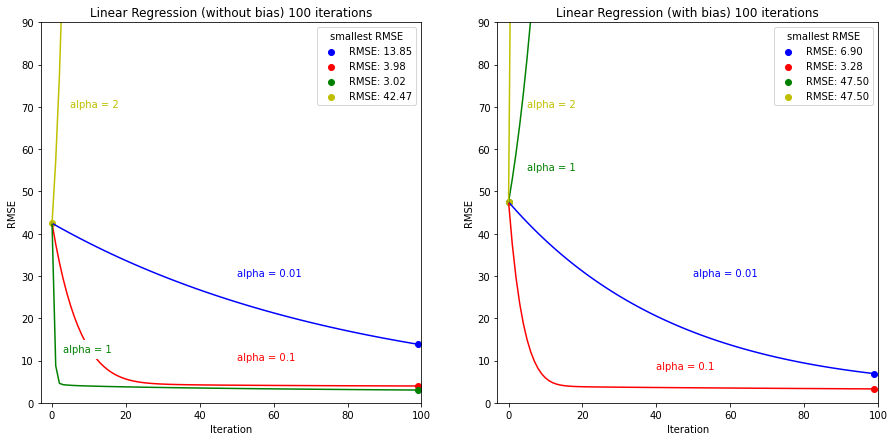

In [145]:
# -------- MAIN --------

# normalize
cylNorm = normalizeMinMax(cyl)
displNorm = normalizeMinMax(displ) 
hpNorm = normalizeMinMax(hp) 
weightNorm = normalizeMinMax(weight) 
accNorm = normalizeMinMax(acc) 
yearNorm = normalizeMinMax(year)
mpgNorm = normalizeMinMax(mpg)

xVals = np.column_stack((cylNorm, displNorm, hpNorm, weightNorm, accNorm, yearNorm)) # create matrix from the normalized xValues




# ---- with bias ----

# linear regression const parameters
iterations = 100
rnd.seed(7)
theta = rnd.rand(6, 1)

# store values (without bias)
blue = linReg(iterations, theta, 0.01)
red = linReg(iterations, theta, 0.1)
green = linReg(iterations, theta, 1)
yellow = linReg(iterations, theta, 2)

# plot
plt.subplots(figsize=(15, 7))
plt.subplot(1, 2, 1)

plt.title("Linear Regression (without bias) 100 iterations")
plt.ylabel("RMSE") 
plt.xlabel("Iteration")

plt.axis([-3, 100, 0, 90])
plt.plot(range(iterations), blue, "b")
plt.plot(range(iterations), red, "r")
plt.plot(range(iterations), green, "g")
plt.plot(range(iterations), yellow, "y")

# show best RMSE
plt.scatter(np.argmin(blue), np.min(blue), c='b', label='RMSE: ' '{:.2f}'.format(np.min(blue)))
plt.scatter(np.argmin(red), np.min(red), c='r', label='RMSE: ' '{:.2f}'.format(np.min(red)))
plt.scatter(np.argmin(green), np.min(green), c='g', label='RMSE: ' '{:.2f}'.format(np.min(green)))
plt.scatter(np.argmin(yellow), np.min(yellow), c='y', label='RMSE: ' '{:.2f}'.format(np.min(yellow)))
plt.legend(title="smallest RMSE")

# labels
plt.annotate('alpha = 0.01', color="b", xy=(50,30))
plt.annotate('alpha = 0.1', color="r", xy=(50,10))
plt.annotate('alpha = 1', color="g", xy=(3,12), backgroundcolor='w')
plt.annotate('alpha = 2', color="y", xy=(5,70))






# ---- without bias ----

theta = rnd.rand(7, 1)
xVals = np.insert(xVals, 0, 1, axis=1) # insert x0 = 1 column


# store values (without bias)
blue = linReg(iterations, theta, 0.01)
red = linReg(iterations, theta, 0.1)
green = linReg(iterations, theta, 1)
yellow = linReg(iterations, theta, 2)

# second plot
plt.subplot(1, 2, 2)
plt.title("Linear Regression (with bias) 100 iterations")
plt.ylabel("RMSE") 
plt.xlabel("Iteration")

plt.axis([-3, 100, 0, 90])
plt.plot(range(iterations), blue, "b")
plt.plot(range(iterations), red, "r")
plt.plot(range(iterations), green, "g")
plt.plot(range(iterations), yellow, "y")

# show best RMSE
plt.scatter(np.argmin(blue), np.min(blue), c='b', label='RMSE: ' '{:.2f}'.format(np.min(blue)))
plt.scatter(np.argmin(red), np.min(red), c='r', label='RMSE: ' '{:.2f}'.format(np.min(red)))
plt.scatter(np.argmin(green), np.min(green), c='g', label='RMSE: ' '{:.2f}'.format(np.min(green)))
plt.scatter(np.argmin(yellow), np.min(yellow), c='y', label='RMSE: ' '{:.2f}'.format(np.min(yellow)))
plt.legend(title="smallest RMSE")

# labels
plt.annotate('alpha = 0.01', color="b", xy=(50,30))
plt.annotate('alpha = 0.1', color="r", xy=(40,8))
plt.annotate('alpha = 1', color="g", xy=(5,55))
s = plt.annotate('alpha = 2', color="y", xy=(5,70))
